# Decrease Key and Delete Node Operations on a Fibonacci Heap

A fibonacci heap is a tree based data structure which consists of a collection of trees with min heap or max heap property. Its operations are more efficient in terms of time complexity than those of its similar data structures like binomial heap and binary heap.

Now, we will discuss two of its important operations.

* Decrease a key: decreases the value of a the key to any lower value

* Delete a node: deletes the given node

# Decreasing a Key
In decreasing a key operation, the value of a key is decreased to a lower value.


Following functions are used for decreasing the key.

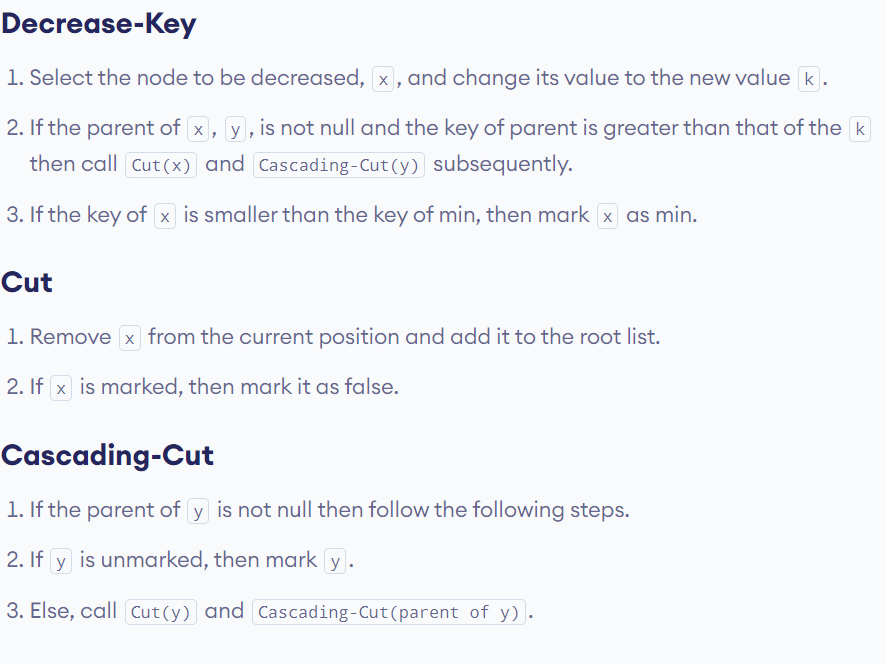

# Decrease Key Example
The above operations can be understood in the examples below.

# Example: Decreasing 46 to 15.

1. Decrease the value 46 to 15.


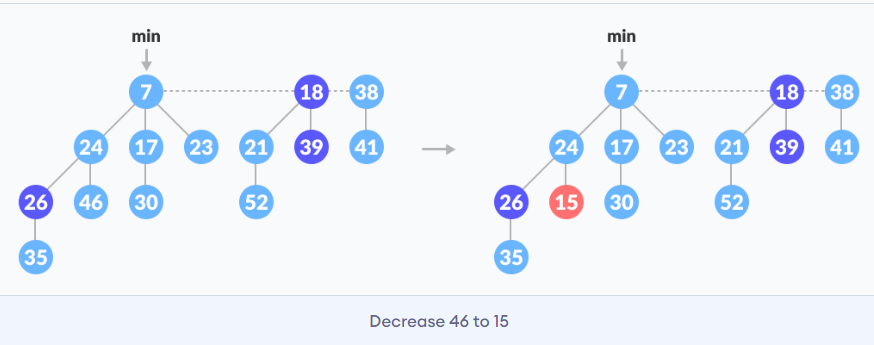

2. Cut part: Since 24 ≠ nill and 15 < its parent, cut it and add it to the root list. Cascading-Cut part: mark 24.

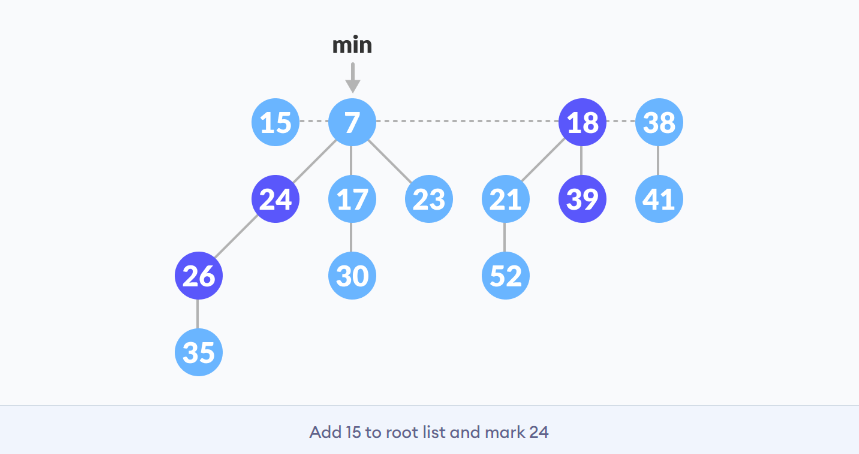

# Example: Decreasing 35 to 5

1 . Decrease the value 35 to 5.


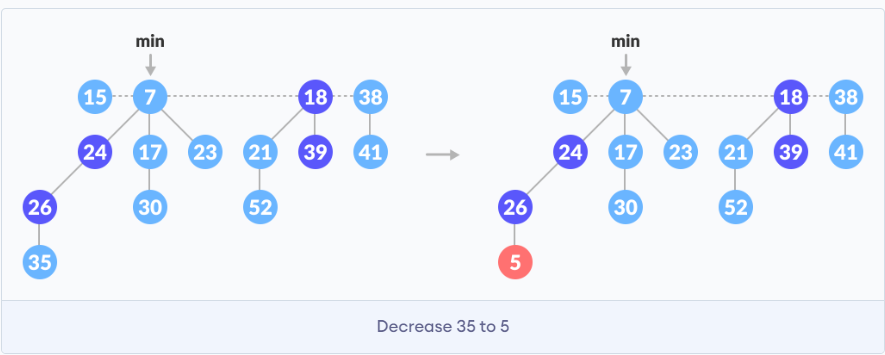

2 Cut part: Since 26 ≠ nill and 5<its parent, cut it and add it to the root list.


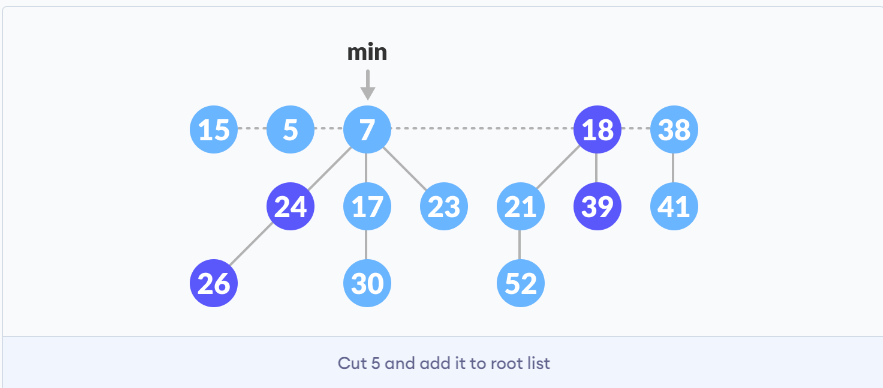

3. Cascading-Cut part: Since 26 is marked, the flow goes to Cut and Cascading-Cut.

Cut(26): Cut 26 and add it to the root list and mark it as false.


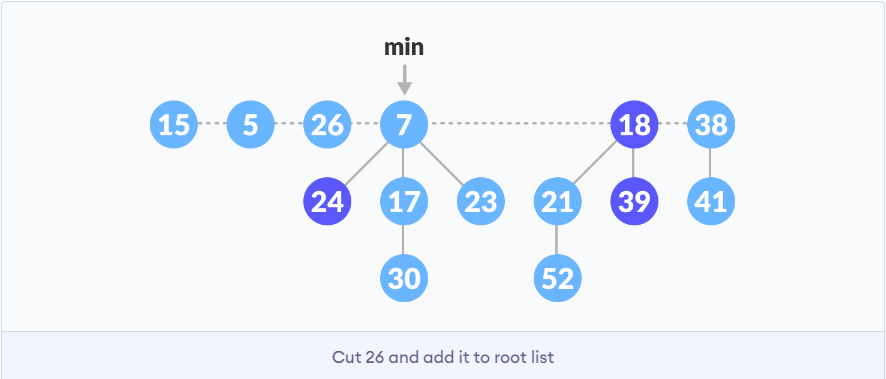

Cascading-Cut(24):

Since the 24 is also marked, again call Cut(24) and Cascading-Cut(7). 

These operations result in the tree below.


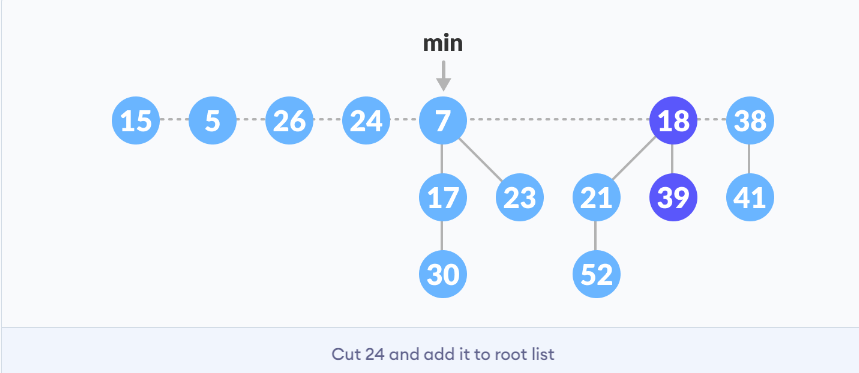

4. Since 5 < 7, mark 5 as min.

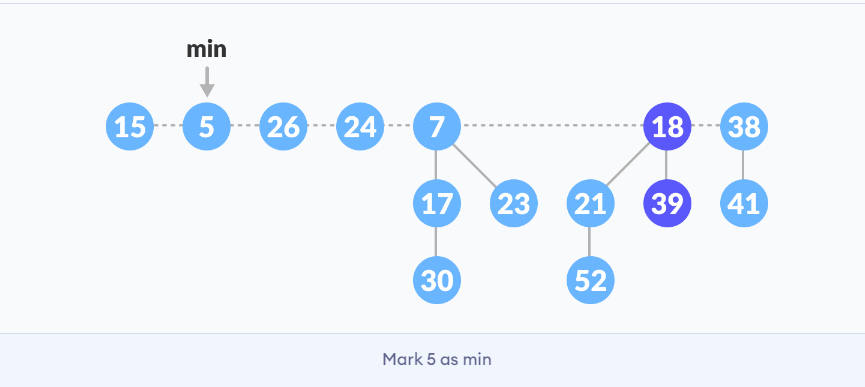

# Deleting a Node
This process makes use of decrease-key and extract-min operations. The following steps are followed for deleting a node.

Let k be the node to be deleted.

Apply decrease-key operation to decrease the value of k to the lowest possible value (i.e. -∞).

Apply extract-min operation to remove this node.


In [1]:
# Fibonacci Heap in python

import math

class FibonacciTree:
    def __init__(self, key):
        self.key = key
        self.children = []
        self.order = 0

    def add_at_end(self, t):
        self.children.append(t)
        self.order = self.order + 1


class FibonacciHeap:
    def __init__(self):
        self.trees = []
        self.least = None
        self.count = 0

    def insert(self, key):
        new_tree = FibonacciTree(key)
        self.trees.append(new_tree)
        if (self.least is None or key < self.least.key):
            self.least = new_tree
        self.count = self.count + 1

    def get_min(self):
        if self.least is None:
            return None
        return self.least.key

    def extract_min(self):
        smallest = self.least
        if smallest is not None:
            for child in smallest.children:
                self.trees.append(child)
            self.trees.remove(smallest)
            if self.trees == []:
                self.least = None
            else:
                self.least = self.trees[0]
                self.consolidate()
            self.count = self.count - 1
            return smallest.key

    def consolidate(self):
        aux = (floor_log2(self.count) + 1) * [None]

        while self.trees != []:
            x = self.trees[0]
            order = x.order
            self.trees.remove(x)
            while aux[order] is not None:
                y = aux[order]
                if x.key > y.key:
                    x, y = y, x
                x.add_at_end(y)
                aux[order] = None
                order = order + 1
            aux[order] = x

        self.least = None
        for k in aux:
            if k is not None:
                self.trees.append(k)
                if (self.least is None
                        or k.key < self.least.key):
                    self.least = k


def floor_log2(x):
    return math.frexp(x)[1] - 1


fheap = FibonacciHeap()

fheap.insert(11)
fheap.insert(10)
fheap.insert(39)
fheap.insert(26)
fheap.insert(24)

print('Minimum value: {}'.format(fheap.get_min()))

print('Minimum value removed: {}'.format(fheap.extract_min()))

Minimum value: 10
Minimum value removed: 10


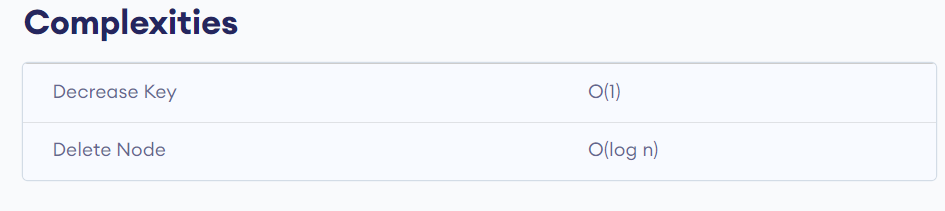